In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Общая характаристика

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [124]:
for column in df.columns:
    ratio_unknown = len(df[df[column].isna()]) / len(df)
    if ratio_unknown > 0:
        print(f'There are {ratio_unknown * 100:5.2f}% rows with unknown "{column}"')

There are 19.87% rows with unknown "age"
There are  0.22% rows with unknown "embarked"
There are 77.22% rows with unknown "deck"
There are  0.22% rows with unknown "embark_town"


In [125]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Анализ по полу

In [44]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [57]:
all_pas = df.shape[0]
men = df.sex.value_counts().male
women = df.sex.value_counts().female
print(f"{women/all_pas*100:0.4}% women and {men/all_pas*100:0.4}% men")

35.24% women and 64.76% men


In [60]:
df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.742038
1,male,0.188908


In [90]:
old_men = df["adult_male"].sum()
print(f"{old_men/all_pas*100:0.4}% adult_male of all passengers")

60.27% adult_male of all passengers


# Анализ по классу

In [94]:
df.pclass.value_counts().sort_values(ascending=False)

3    491
1    216
2    184
Name: pclass, dtype: int64

<AxesSubplot:xlabel='pclass'>

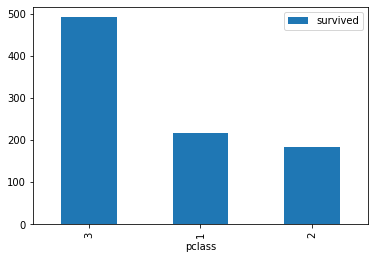

In [123]:
df[['pclass', 'survived']].groupby(['pclass']).count().sort_values(by = "survived", ascending=False).plot.bar()

In [101]:
df[['pclass', 'survived']].groupby(['pclass']).sum().sort_values(by = "survived", ascending=False)

,survived
pclass,
1,136
3,119
2,87


# Анализ по возрасту

<AxesSubplot:ylabel='Density'>

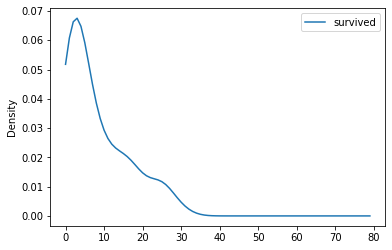

In [122]:
df[['age', 'survived']].groupby(['age']).count().sort_values(by = "survived", ascending=False).plot.kde(ind = list(range(80)))

1. чаще всего выживали дети 5 лет
2. люди старше 40 лет не выживали

In [138]:
min_age = df.age.min()
max_age = df.age.max()
mean_age = df.age.mean()
print(f"min_age: {min_age}, max_age: {max_age}, mean_age: {mean_age:0.4}")

min_age: 0.42, max_age: 80.0, mean_age: 29.7


# Анализ по цене билета

<AxesSubplot:ylabel='Density'>

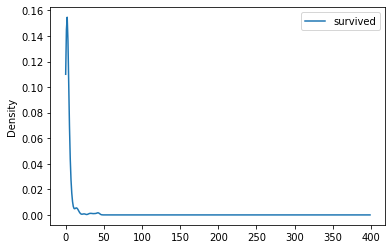

In [140]:
df[['fare', 'survived']].groupby(['fare']).count().sort_values(by = "survived", ascending=False).plot.kde(ind = list(range(400)))

In [149]:
min_fare = df.fare.min()
max_fare = df.fare.max()
mean_fare= df.fare.mean()
print(f"min fare: {min_fare}, max fare: {max_fare}, mean fare: {mean_fare:0.4}")

min fare: 0.0, max fare: 512.3292, mean fare: 32.2
